## IMDB Data Extraction & Transformation

### Import Packages

In [62]:
# Import packages to scrape data from IMDB

from bs4 import BeautifulSoup
import requests, openpyxl
import pandas as pd
import matplotlib.pyplot as plt

### DATA EXTRACTION

In [23]:

#Initialize excel to store data 
excel = openpyxl.Workbook()
#print(excel.sheetname)
sheet = excel.active
sheet.title = 'Top rated movies'
sheet.append(['Move Rank','Movie Name','Year of release','Imdb Rating'])

try:
   source = requests.get('https://www.imdb.com/chart/top/')
   #source = requests.get('https://www.meteomatics.com/')

   source.raise_for_status()

   soup = BeautifulSoup(source.text,'html.parser')
   movies = soup.find('tbody', class_="lister-list").find_all('tr')
   

   for movie in movies:
    name = movie.find('td', class_='titleColumn').a.text
    rank = movie.find('td', class_='titleColumn').get_text(strip=True).split('.')[0]
    year = movie.find('td', class_='titleColumn').span.text.strip('()')
    rating = movie.find('td', class_='ratingColumn imdbRating').strong.text
    #print(name, rank, year, rating)

    sheet.append([rank,name,year,rating])
    


except Exception as e:
   print("error is: ",e)

excel.save('IMDB_Movie.xlsx')


#df = pd.read_csv('IMDB Movie.csv')

### Data Analysis

In [25]:
df = pd.read_excel('IMDB_Movie.xlsx',sheet_name='Top rated movies')
df


,Move Rank,Movie Name,Year of release,Imdb Rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0
...,...,...,...,...
245,246,Life of Brian,1979,8.0
246,247,The Help,2011,8.0
247,248,The Iron Giant,1999,8.0
248,249,Aladdin,1992,8.0


In [29]:
#Checking missing values
print("the missing values are",df.isnull().sum())


the missing values are Move Rank          0
Movie Name         0
Year of release    0
Imdb Rating        0
dtype: int64


In [34]:
if df.isna().any().any() == True:
    df = df.dropna()
else:
    print("There are no missing values in a dataframe")
    

There are no missing values in a dataframe


In [47]:
df.head(5)

,Move Rank,Movie Name,Year of release,Imdb Rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.0
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0


### Analysis of IMDB Ratings

In [39]:
df[df['Imdb Rating'] > 9.0]

,Move Rank,Movie Name,Year of release,Imdb Rating
0,1,The Shawshank Redemption,1994,9.2
1,2,The Godfather,1972,9.2


<Axes: ylabel='Frequency'>

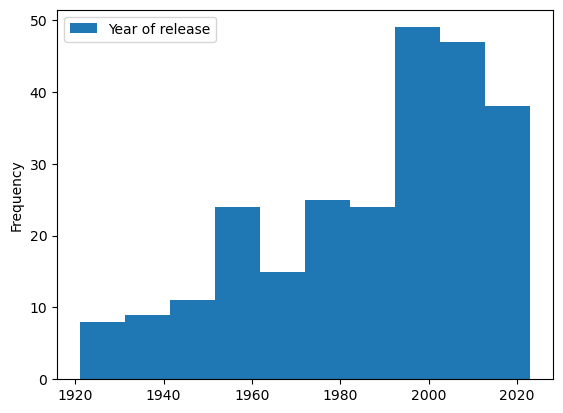

In [44]:
df.plot(x='Imdb Rating',y='Year of release',kind="hist")

<Axes: ylabel='Frequency'>

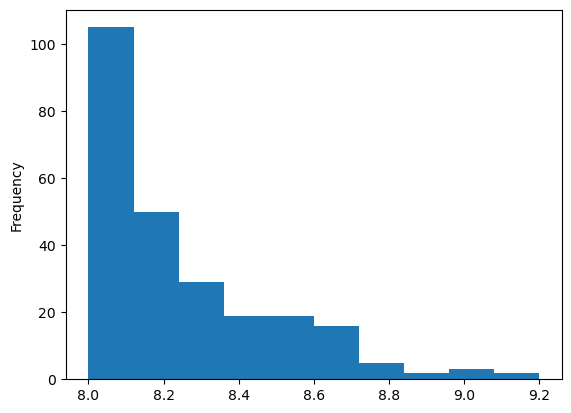

In [45]:
df['Imdb Rating'].plot.hist(bins=10)

#### Top 10 movies 

Top Rated Movies:
   Move Rank                                         Movie Name  Imdb Rating
0          1                           The Shawshank Redemption          9.2
1          2                                      The Godfather          9.2
2          3                                    The Dark Knight          9.0
3          4                              The Godfather Part II          9.0
4          5                                       12 Angry Men          9.0
5          6                                   Schindler's List          8.9
6          7      The Lord of the Rings: The Return of the King          8.9
7          8                                       Pulp Fiction          8.8
8          9  The Lord of the Rings: The Fellowship of the Ring          8.8
9         10                     The Good, the Bad and the Ugly          8.8


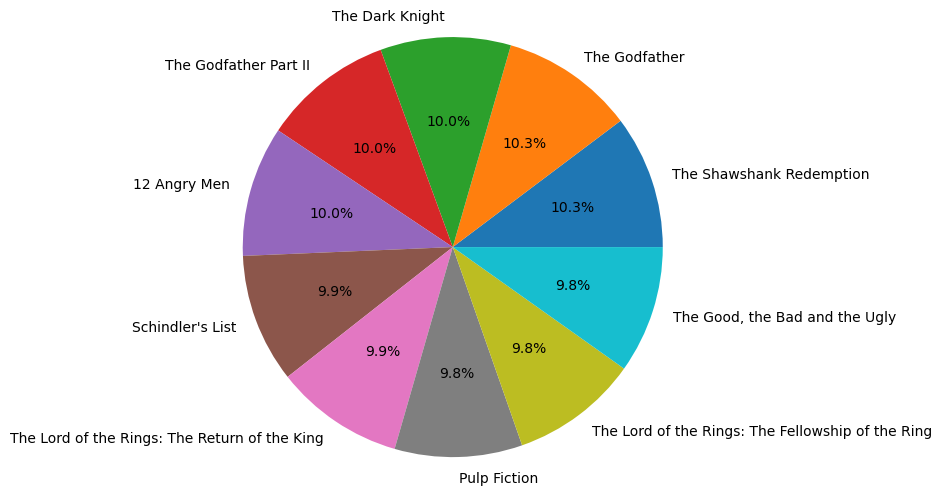

In [74]:

top_rated_movies = df.nlargest(10, 'Imdb Rating')
print("Top Rated Movies:")
print(top_rated_movies[['Move Rank', 'Movie Name', 'Imdb Rating']])
#top_rated_movies.displot(x='Imdb Rating',y='Movie Name',kind="hist")
#plot = top_rated_movies.plot.pie(y='Imdb Rating',subplots=True, figsize=(5, 5))

plt.figure(figsize=(8, 6))
plt.pie(top_rated_movies['Imdb Rating'], labels=top_rated_movies['Movie Name'], autopct='%1.1f%%')
#plt.title('Top Rated Movies')
plt.axis('equal')
plt.show()




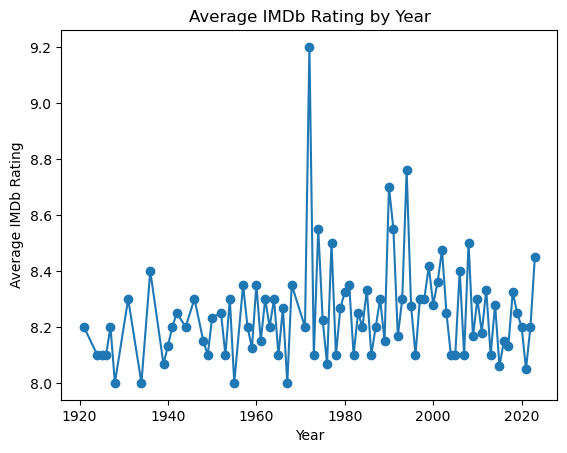

In [76]:
# Yearly Analysis - Average IMDb Rating
yearly_average_rating = df.groupby('Year of release')['Imdb Rating'].mean()
yearly_average_rating.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Year')
plt.show()